# Intro to Python with Stellar Photometry

In this exercise, we'll get practice using two packages commonly used in astronomy for manipulating data and plotting it: `numpy` and `matplotlib`.

We'll use these packages to read in data from a simulated Sun-like star, and examine the relations between observable properties (color and magnitude) and theoretical properties (temperature and luminosity) of stars. 

## Plotting with Matplotlib (https://matplotlib.org/3.1.0/index.html)

Before we get started, we need to initialize the environment. First, let's import pyplot from matplotlib, which we will use to plot things. Then, we can use one of the "magic commands" to enable in-line plotting, which ensures our plots will show up in our actual notebook (rather than externally).

In [1]:
# import plotting utility and define our naming alias
from matplotlib import pyplot as plt

# plot figures within the notebook rather than externally
%matplotlib inline

## NumPy (https://www.numpy.org/)

NumPy is a package that will help a lot in creating arrays and providing math functions that are ready to use in manipulating the data that we will be plotting. Let's import it too.

In [ ]:
# import numpy
import numpy as np

Let's quickly generate some data. We'll start with a "grid" of points $\mathbf{x}$ and compute the corresponding output $\mathbf{y}$.

In [ ]:
# define a relationship: y = ax + b
a, b = 1., 0.  # the trailing decimal guarantees this is a "float" rather than "int"

# initialize our data
n = 1000  # number of data points
x = np.linspace(0., 100., n)  # our grid of `n` data points from 0. to 100.
y = a * x + b  # our output y

Now let's add some noise to our results using `numpy`'s built-in `random` module.

In [ ]:
# add in noise drawn from a normal distribution
ye = np.random.normal(loc=0., scale=5., size=n)  # jitter
yobs = y + ye  # observed result

Let's see how our results look.

In [ ]:
# plot our results
plt.plot(x, yobs)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('A (Noisy) Line')

Play around with the parameters above to get some more familiarity with plotting. If you have time, see if you can:
 + Change the original relationship to a quadratic one.
 + Change the type of random noise we are adding to the data.
 + Change the colors used for plotting.
 + Change the "linestyle" used for plotting from connected lines to unconnected dots.
 + Change the x and y limits in the plot.
    and any other changes you'd like to experiment with.
    
Feel free to use any resources you want to figure this out. For immediate results, try the `help` function (shown below) or **Shift-Tab** within a function for in-line documentation. There's also some official documentation [online](https://matplotlib.org/faq/usage_faq.html)

# Setting Plot Defaults

I always find the default label and axes markers to be too small to easily read (especially when showing people plots). Luckily, it's pretty straightforward to change the plotting defaults for matplotlib to make things easier to read. We can override the defaults whenever we plot something (which we'll get to in a bit) or we can just update them all at once (as below).

In [7]:
# re-defining plotting defaults
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '7.5'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '3.5'})
rcParams.update({'xtick.minor.width': '1.0'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '7.5'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '3.5'})
rcParams.update({'ytick.minor.width': '1.0'})
rcParams.update({'axes.titlepad': '15.0'})
rcParams.update({'font.size': 30})

The set of commands above probably didn't work on the first try. What gives? Looking at the error, it's telling us that the name 'rcParams' is not defined in any capacity. This makes some sense: we never defined this variable anywhere. See if you can find out where to import it.

Let's re-plot our results to see what updating our defaults has changed.

In [ ]:
# plot our results
plt.figure(figsize=(10, 4))
plt.plot(x, yobs)
plt.plot(x, y)
plt.xlabel('x', fontsize=20, color='darkviolet')
plt.ylabel('y', fontsize=40, color='red')
plt.title('A (Noisy) Line with Larger Font', y=1.05, color='navy')

Now that we've changed the defaults, we notice a number of issues with our plot to do with our font size. This is because all outputs from `pyplot` are intrinsically drawn on a `Figure` object. If one of these are not initialized explicitly at the beginning, a default one is created. With our new larger fonts, the default figure feels a little squished.

Play around with changing the size of our figure using the commented line. Feel free to also mess around with the arguments passed to the axes labels and titles.

# Stellar Photometry

Photometry is measured through bandpass filters (examples?). Ideally, the filters would have a boxcar shape, with sharp short and long wavelength cutoffs and a smooth, flat behavior in between. In practice, the filters often have a complicated shape due to the nature of the material comprising the filter, in addition to atmospheric effects, the transmission properties of the telescope optics, and the quantum efficiency of the CCD. Usually then, when constructing magnitudes from a spectrum, one must take an appropriate average of $f_{\nu}$ over the filter bandpass $X$, $\langle{f_{\nu}\rangle}_X\approx f_{\nu}(\lambda_{\rm{eff}})$. This assumption breaks down dramatically in the limit where the flux of the source varies rapidly across the filter (e.g., if the filter is probing he Wein tail of the Planck function). (table of eff. lamb)

# 1. Magnitudes and Colors

When we observe stars, two commonly used an fundamental measurements are the star's magnitude and color. 

## 1.1 Magnitude

The "magnitude" quantifies how bright a star is relative to other objects. It measures the star's flux of photons hitting a detector; it is a proxy for the luminosity of a star. Magnitudes are defined such that 

$$m\propto-2.5\rm{log}f_{\nu}$$, 

where $f_{\nu}$ is the flux of an astronomical source. When we define how bright an object is, we need to say how bright it is in reference to something (like how we define how tall we are in reference to the ground usually), so we need a "zero point". There are three common methods for defining the zero points. Let's focus on the AB system, in which the magnitude system is defined according to 

$$\boxed{m=-2.5\rm{log}f_{\nu}-48.60}$$, 

where the units of $f_{\nu}$ are in cgs (erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$). The apparent (observed) magnitude is written as $m$. (Note: since higher flux means a brighter source, the brightest objects will have negative magnitudes and the faintest will have positive magnitudes.)

Let's write this up as a function.

In [ ]:
def magnitude(flux):
    
    # return the magnitude of a star in 
    # the AB magnitude system
    return -2.5 * np.log10(flux) - 48.60

## 1.2 Color

The color of a star is simply the difference between the magnitudes of the star measured in two different bandpasses. Since different bandpasses are sensitive to different wavelength ranges (e.g., to either UV or IR), the color measures how much a star emits its light in e.g., UV light, compared to IR light. The convention for color is

$$
    \rm{color} = \left(\rm{shorter\ wavelength\ bandpass}\right) - \left(\rm{longer\ wavelength\ bandpass}\right)
$$

so, for example a color might be

$$
    \rm{color} = UV - I
$$

A negative color indicates a star that emits more photons at longer wavelengths than at shorter wavelengths. Recall that we often think of infrared light (longer wavelengths) as "red" and ultraviolet light as being "blue", so a star that emits more strongly in IR light than UV is said to be "redder" than a star that emits more strongly in the UV than the IR (which we would call "bluer"). So, the color of a star is telling us if the star would emits more red or blue light, which is pretty useful, because we know that there's a link between cooler objects emitting red light (like an orange flame), and hot objects emitting blue light (like a spaceshuttle's afterburners). So the color is really telling us how hot or cool the star is, i.e., its temperature.

Let's write up a function to calculate the color of a star.

In [ ]:
def color(blue_mag, red_mag):
    
    # return the color, given the magnitude
    # in two different bandpasses
    return blue_mag - red_mag

# $T_{eff}$ - color Relations

Assume that the flux of a star can be approximated by the Planck function. The Planck function is used to describe the spectral energy distribution (sort of like flux as a function of wavelength, or equivalently frequency) of a blackbody, so we're essentially assuming that the star may be approximated as a blackbody. The Planck function looks like this:

\begin{equation*}
 \boxed{B_{\nu}\left(\nu,T\right) = 
           \frac{2h\nu^3 / c^2}{exp\left(h\nu / kT\right) - 1}}
\end{equation*}

as a function of frequency, and like this:

\begin{equation*}
 \boxed{B_{\nu}\left(\lambda, T\right) = 
        \frac{2 h c / \lambda^3}{exp\left(h c / \lambda k T\right) - 1}}
\end{equation*}

as a function of wavelength. Recall that wavelength and frequency are proportional according to $\nu = c / \lambda$, with $c$ being the speed of light. You can pick either form, but the wavelength dependent version will be the most straightforward. Now, we'll just impose our assumption that the flux may be approximated by the Planck function to give us an expression for the flux of the star, e.g.:

\begin{equation*}
 \boxed{f_{\nu} = B_{\nu}\left(\lambda, T\right)}
\end{equation*}

So we see that the flux, or how many photons emitted by the star at a particular wavelength, is related to its temperature, $T$.

Let's write the Planck function in Python.

In [9]:
# define blackbody
def blackbody(wave, temp):
    """
        Compute blackbody at wavelength (in A) 
        given a temperature (in K).
    """
    
    w = wave * 1e-10  # convert to m
    nu = c / w  # convert to frequency
    term1 = (2. * h * nu**3 / c**2)  # power law
    term2 = np.exp((h * nu) / (k * temp))  # exponential
    bbody = term1 / (term2 - 1.)  # W/sr/m^2/Hz
    bbody *= 4 * np.pi  # W/m^2/Hz
    bbody *= 1e3  # erg/s/cm^2/Hz
    
    return bbody

Let's make a grid of wavelength values and see how the Planck function behaves for several choices of temperature (say, temperatures ranging from 5000 to 11,000 Kelvin, typical of the surface temperature of some stars).

In [ ]:
wgrid = np.linspace(2000., 20000., 1000)  # wavelength grid

# plot up the prototypical blackbody curve
plt.figure(figsize=(20, 10))
for temp in np.linspace(5000, 11000, 6):
    plt.plot(wgrid, blackbody(wgrid, temp), lw=5)
plt.xlabel(r'Wavelength $[{\AA}]$')
plt.ylabel(r'Flux Density $[{\rm erg/s/cm^2/Hz}]$')
plt.tight_layout()


Normally, you'd have to integrate the Planck function over some range of wavelengths or frequencies in order to turn it into flux. We're going to make one more simplifying assumption though, and just say that the flux in a particular bandpass is equal to the Planck function at the "effective wavelength" of that bandpass. Here's a table with the effective wavelengths of several bandpasses: NUV, U, B, V, R, I, J, H, K.


| Filter | $\lambda_{\rm{eff}} [\mu m]$ |
| --- | --- |
| NUV | 0.23 |
| U | 0.36 |
| B | 0.44 |
| V | 0.55 |
| R | 0.67 |
| I | 0.79 |
| J | 1.24 |
| H | 1.65 |
| K | 2.16 |

There is also a data table called `eff_wavelengths.dat` saved with these wavelengths ready to read in. Let's read this data in so that we can use it later.

In [31]:
# read in the effective wavelength table
data = np.genfromtxt('eff_wavelengths.dat', dtype=['<U8', '<f8'])
print(data)

# could have them create a dictionary...maybe leave this out for discovery & exploration
l_eff = {filter_name:effective_l*1e4 for filter_name, effective_l in data}

[('NUV', 0.23) ('U', 0.36) ('B', 0.44) ('V', 0.55) ('R', 0.67) ('I', 0.79)
 ('J', 1.24) ('H', 1.65) ('K', 2.16)]
{'NUV': 2300.0, 'U': 3600.0, 'B': 4400.0, 'V': 5500.0, 'R': 6700.0, 'I': 7900.0, 'J': 12400.0, 'H': 16500.0, 'K': 21600.0}


Now that we have our data read in, functions defined, and plot environment set, compute relations between $T_{\rm{eff}}$ and the following colors: $NUV-V$, $B-V$, $R-I$, $J-K$. Plot the resulting relations with $\rm{log}(T_{\rm{eff}})$ on the x-axis and the four colors plotted together on a single plot. Use different colors and/or linestyles for the different relations. Clearly label the axes and include a legend.

In [33]:
# grid in effective temperatures
tgrid = np.logspace(3.25, 5, 10000)

# magnitudes
mag_nuv = -2.5 * np.log10(blackbody(l_eff['NUV'], tgrid))
mag_b = -2.5 * np.log10(blackbody(l_eff['B'], tgrid))
mag_v = -2.5 * np.log10(blackbody(l_eff['V'], tgrid))
mag_r = -2.5 * np.log10(blackbody(l_eff['R'], tgrid))
mag_i = -2.5 * np.log10(blackbody(l_eff['I'], tgrid))
mag_j = -2.5 * np.log10(blackbody(l_eff['J'], tgrid))
mag_k = -2.5 * np.log10(blackbody(l_eff['K'], tgrid))

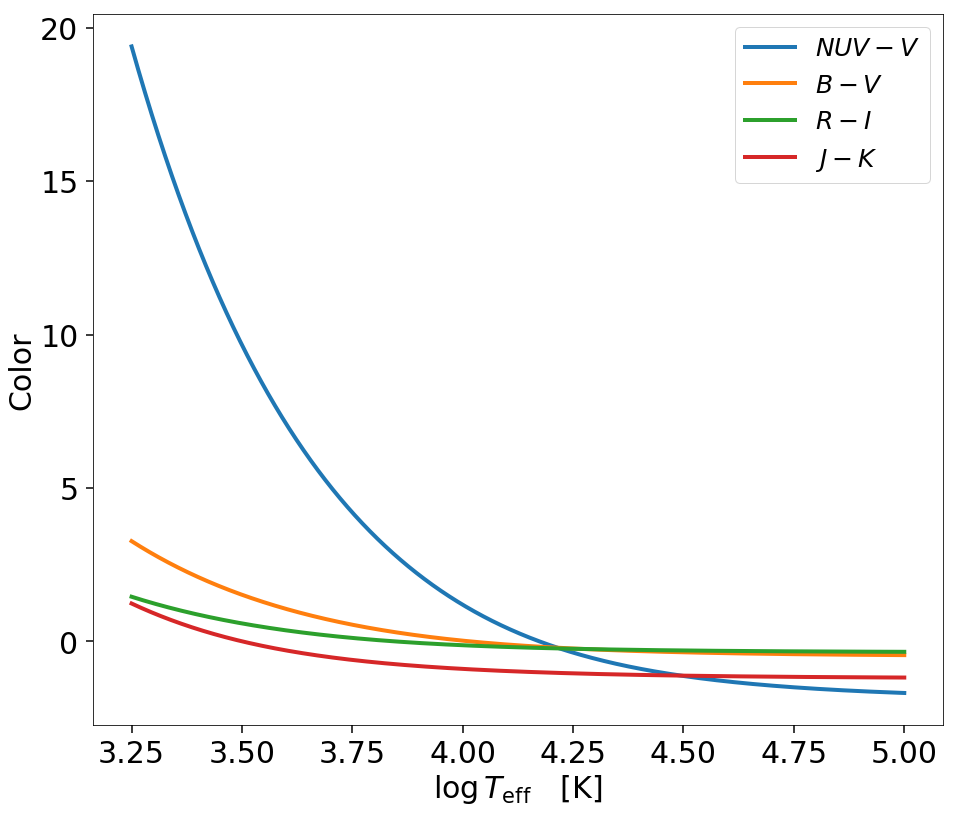

In [34]:
plt.figure(figsize=(14, 12))
plt.plot(np.log10(tgrid), mag_nuv - mag_v, lw=4, label=r'$NUV - V$')
plt.plot(np.log10(tgrid), mag_b - mag_v, lw=4, label=r'$B - V$')
plt.plot(np.log10(tgrid), mag_r - mag_i, lw=4, label=r'$R - I$')
plt.plot(np.log10(tgrid), mag_j - mag_k, lw=4, label=r'$J - K$')
plt.xlabel(r'$\log \, T_{\rm eff} \quad [{\rm K}]$')
plt.ylabel('Color')
plt.legend(fontsize='small')
plt.tight_layout()

# The Color-Magnitude Diagram

For the second part of the exercise, we're going to continue along getting practice reading data, manipulating it, and plotting it. This time, we'll read in a large data table from a simulation of a Sun-like star. (For those interested, this simulation was done with a code called MESA, widely used in modern stellar astrophysics. You can check it out here: http://mesa.sourceforge.net/.)

So, let's star by reading in the data table. It's called `0010000M.track.eep`. Each row in this data table gives various properties of the star at a particular point of time since before it started Hydrogen fusion, all the way up until it became a white dwarf. Each of the various properties corresponds to a particular column, with header names given in the file.

In [44]:
# read in data
mesa_filename = '0010000M.track.eep'
data = np.genfromtxt(mesa_filename, names=True, skip_header=11)

This data table has a bunch of columns, but we're going to be interested in creating a "color-magnitude" diagram, or CMD. This is the observer's version of the Hertzsprung-Russell diagram (HRD), which plots the theoretical values of luminosity ($L$), vs. effective temperature ($T_{\rm{eff}}$). The CMD is a fundamental tool in astronomy in order to study stars as they evolve.

To get on our way with creating a CMD, we're going to need magnitudes and colors. So, we know from the previous section how to compute magnitudes (approximately): it takes an effective wavelength for the bandpass, and for the magnitude of a particular star, we'll need its temperature.

So, let's get the column `log_Teff` from the data table, and use it to compute the magnitude of the star throughout its lifetime.

In [53]:
# magnitudes
mag_nuv = -2.5 * np.log10(blackbody(l_eff['NUV'], 10**data['log_Teff']))
mag_b = -2.5 * np.log10(blackbody(l_eff['B'], 10**data['log_Teff']))
mag_v = -2.5 * np.log10(blackbody(l_eff['V'], 10**data['log_Teff']))
mag_r = -2.5 * np.log10(blackbody(l_eff['R'], 10**data['log_Teff']))
mag_i = -2.5 * np.log10(blackbody(l_eff['I'], 10**data['log_Teff']))
mag_j = -2.5 * np.log10(blackbody(l_eff['J'], 10**data['log_Teff']))
mag_k = -2.5 * np.log10(blackbody(l_eff['K'], 10**data['log_Teff']))

With these magnitudes, plot CMDs of the star for NUV - V vs. V, B-V vs. V, V-K vs. K, and J-K vs. K. Plot the magnitude on the y-axis, and color on the x-axis. Compare these CMDs to HRDs. To create the HRDs, you'll need to plot the star's log luminosity vs. log effective temperature. See if there are any differences between the HRD and CMD.

In [54]:
# MAYBE WE DON'T NEED THIS? CHARLIE REQUIRED THE ABSOLUTE MAG BE PLOTTED, BUT MAYBE THIS IS TOO PHYSICSY, RATHER 
# THAN CODEY...


# solar values
MV_solar = 4.83  # absolute mag
solar_teff = 5780.  # T_eff [K]

offset = MV_solar + 2.5 * np.log10(blackbody(l_eff['V'], solar_teff))  # zero-point
lcorr = -5 * data['log_R'] + offset  # luminosity correction

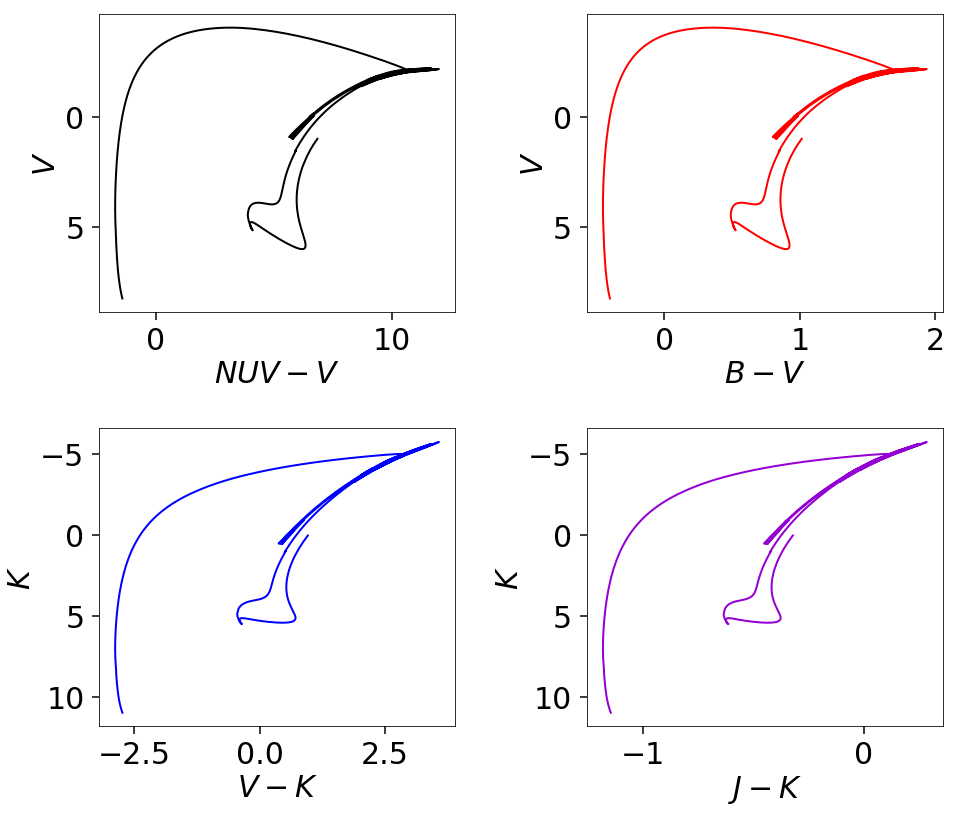

In [55]:
# plot "corrected" CMDs for our MESA track

plt.figure(figsize=(14, 12))
plt.subplot(2, 2, 1)
plt.plot(mag_nuv - mag_v, mag_v + lcorr,
         lw=2, color='black')
plt.xlabel(r'$NUV - V$')
plt.ylabel(r'$V$')
plt.ylim(plt.ylim()[::-1])
plt.tight_layout()
plt.subplot(2, 2, 2)
plt.plot(mag_b - mag_v, mag_v + lcorr,
         lw=2, color='red')
plt.xlabel(r'$B - V$')
plt.ylabel(r'$V$')
plt.ylim(plt.ylim()[::-1])
plt.tight_layout()
plt.subplot(2, 2, 3)
plt.plot(mag_v - mag_k, mag_k + lcorr,
         lw=2, color='blue')
plt.xlabel(r'$V - K$')
plt.ylabel(r'$K$')
plt.ylim(plt.ylim()[::-1])
plt.tight_layout()
plt.subplot(2, 2, 4)
plt.plot(mag_j - mag_k, mag_k + lcorr,
         lw=2, color='darkviolet')
plt.xlabel(r'$J - K$')
plt.ylabel(r'$K$')
plt.ylim(plt.ylim()[::-1])
plt.tight_layout()